In [1]:

# simpleCPP_sim.py - Directly simulates a model that
# assumes CPP slopes are generated from drift rates
#
# Copyright (C) 2022 Michael D. Nunez, <m.d.nunez@uva.nl>
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.
#
# Record of Revisions
#
# Date              Programmers                          Descriptions of Change
# ====            ================                       ======================
# 01-March-2022     Michael Nunez                             Original code

# To do: Generate estimated CPP waveforms for each trial

# Modules
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib import rc


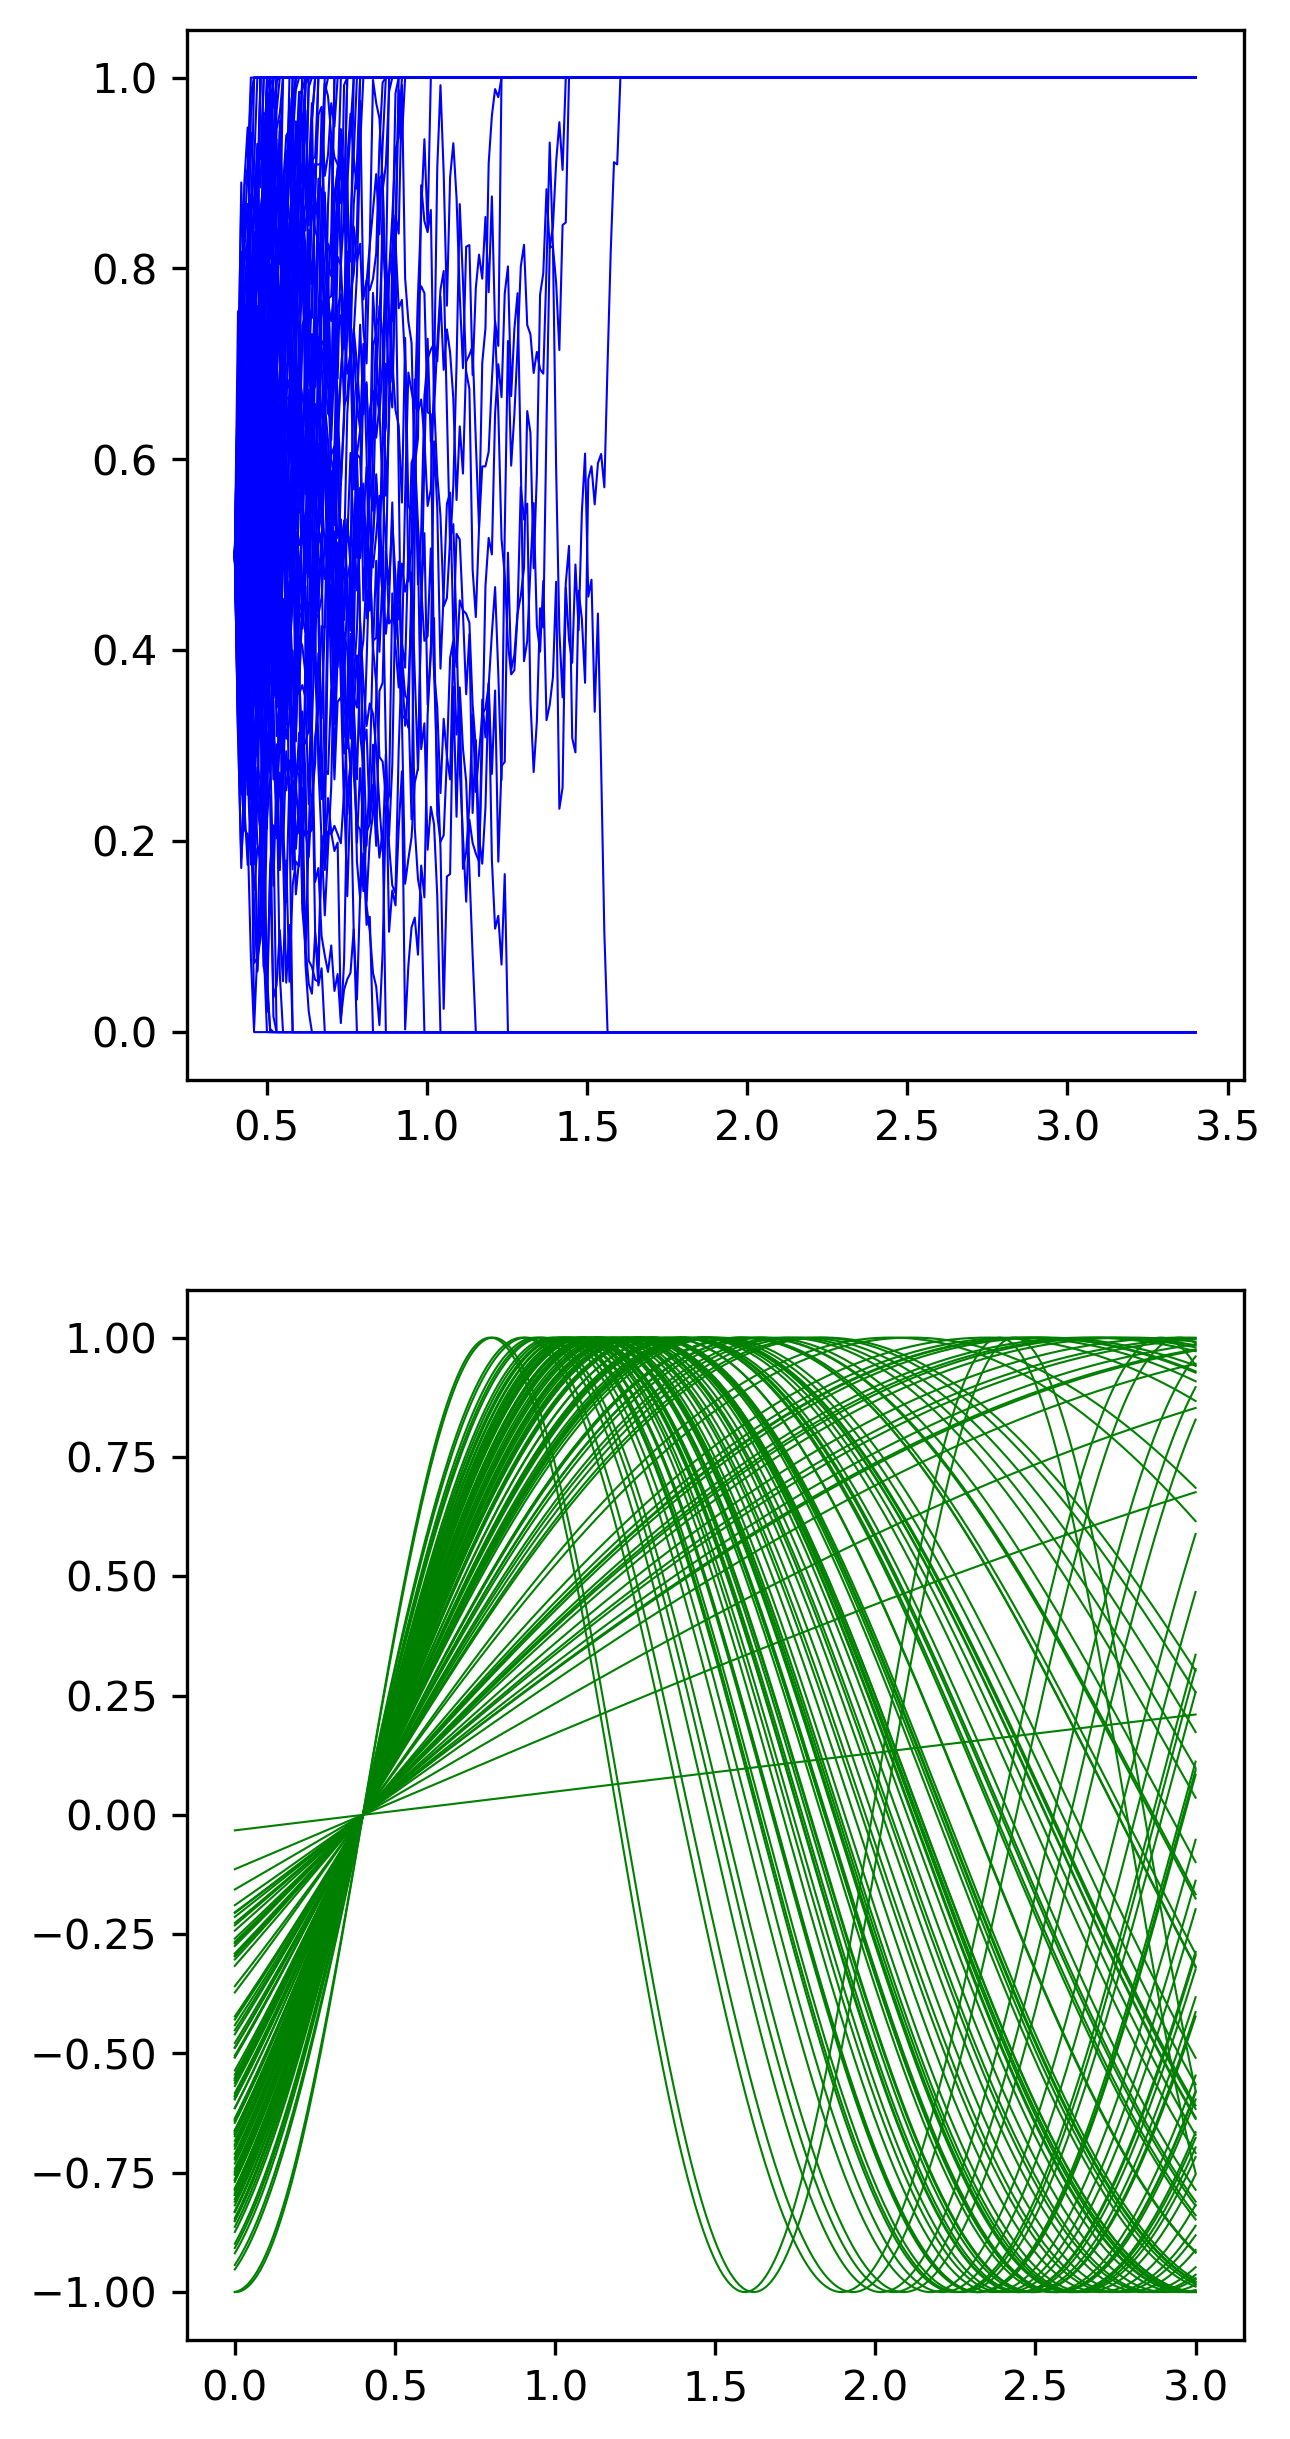

In [2]:


# Simulation data and parameters
ntrials = 1000
alpha = 1  # Boundary parameter
ndt = .4  # Non-decision time in seconds
delta = 1  # Mean drift-rate across trials
beta = .5  # Relative start point, proportion of boundary
eta = .3  # Additional trial-to-trial variability in drift rate
varsigma = 1  # Accumulation variance (diffusion coefficient)
sigma = .5  # Observation noise of the CPP slope
nsteps = 300  # nsteps*step_length is seconds after ndt
step_length = .01


# Initialize output vectors
rts = np.zeros(ntrials)
choice = np.zeros(ntrials)
cpp_slopes = np.zeros(ntrials)
CPPs = np.zeros((nsteps, ntrials))

# Try different random seeds
np.random.seed(1)

# Set up subplots
fig = plt.figure(figsize=(10, 10), dpi=300)
gs = gridspec.GridSpec(2, 2)

# Direct simulation
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])
plot_time = np.linspace(0, step_length * nsteps, num=nsteps)
for n in range(0, ntrials):
    random_walk = np.empty(nsteps)
    drift = stats.norm.rvs(loc=delta, scale=eta)
    cpp_slopes[n] = stats.norm.rvs(loc=delta, scale=sigma)
    CPPs[:, n] = np.sin(2 * np.pi * ((cpp_slopes[n] / 4) * (plot_time - ndt)))
    random_walk[0] = beta * alpha
    for s in range(1, nsteps):
        random_walk[s] = random_walk[s - 1] + stats.norm.rvs(
            loc=drift * step_length, scale=varsigma * np.sqrt(step_length))
        if random_walk[s] >= alpha:
            random_walk[s:] = alpha
            rts[n] = s * step_length + ndt
            choice[n] = 1  # Correct choice shown with positive RTs
            break
        elif random_walk[s] <= 0:
            random_walk[s:] = 0
            rts[n] = s * step_length + ndt
            choice[n] = -1  # Incorrect choice shown with negative RTs
            break
        elif s == (nsteps - 1):
            rts[n] = np.nan
            choice[n] = np.nan
            break
    if n < 100:  # Plot only the first 100 trials
        ax1.plot(plot_time + ndt, random_walk, color='blue', linewidth=0.5)
        ax2.plot(plot_time, CPPs[:, n], color='green', linewidth=0.5)


There are 0 missing responses
The mean response time is 0.689 seconds
The minimum response time is 0.420 seconds
The maximum response time is 1.970 seconds


/var/folders/sy/0z_w7rds3079fc66vmqlqgzw0000gn/T/ipykernel_30275/2860048265.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(choice_rts, shade=True, color='blue', bw_adjust=.5, ax=ax3)
/var/folders/sy/0z_w7rds3079fc66vmqlqgzw0000gn/T/ipykernel_30275/2860048265.py:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cpp_slopes, shade=True, color='green', bw_adjust=1, ax=ax4)


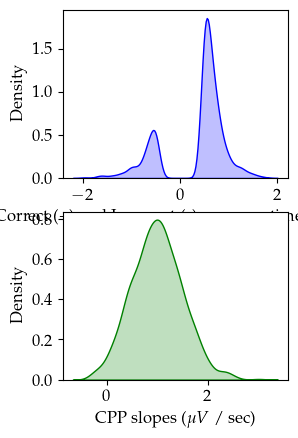

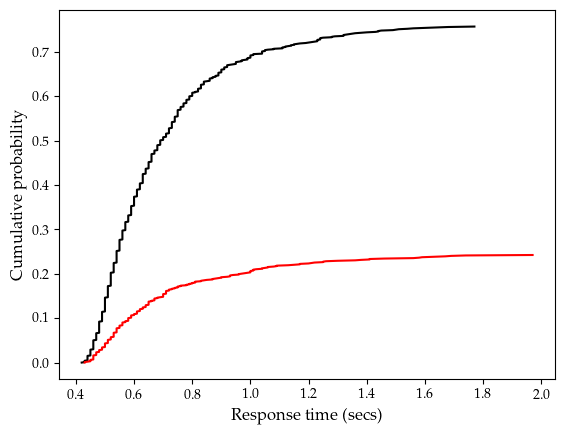

In [3]:


rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)  # sudo apt install texlive-latex-extra cm-super dvipng

# Plotting parameters for evidence accumulation plots
font_size = 12
ax1.tick_params(axis='both', which='major', labelsize=font_size)
ax1.set_xlim([ndt, 2])
ax1.set_xlabel('Time (sec)', fontsize=font_size)
ax1.set_ylabel('Evidence for correct ($\\mu V$)', fontsize=font_size)

# Plotting parameters for centro-parietal positivity (CPP) plots
ax2.tick_params(axis='both', which='major', labelsize=font_size)
ax2.set_xlim([ndt, 2])
ax2.set_ylim([0, alpha + .05])
ax2.set_xlabel('Time (sec)', fontsize=font_size)
ax2.set_ylabel('Evidence for correct ($\\mu V$)', fontsize=font_size)

# Statistics of simulation
print('There are %d missing responses' % np.sum(np.isnan(rts)))
print('The mean response time is %.3f seconds' % (np.nanmean(rts)))
print('The minimum response time is %.3f seconds' % (np.nanmin(rts)))
print('The maximum response time is %.3f seconds' % (np.nanmax(rts)))


# Plot estimated density of response times
ax3 = plt.subplot(gs[0, 1])
choice_rts = rts * choice
sns.kdeplot(choice_rts, shade=True, color='blue', bw_adjust=.5, ax=ax3)
ax3.set_xlabel(
    'Correct (+) and Incorrect (-) response times (secs)', fontsize=font_size)
ax3.set_ylabel('Density', fontsize=font_size)
ax3.tick_params(axis='both', which='major', labelsize=font_size)


# Plot estimated density of CPP slopes

ax4 = plt.subplot(gs[1, 1])
sns.kdeplot(cpp_slopes, shade=True, color='green', bw_adjust=1, ax=ax4)
ax4.set_xlabel('CPP slopes ($\\mu V$ / sec)', fontsize=font_size)
ax4.set_ylabel('Density', fontsize=font_size)
ax4.tick_params(axis='both', which='major', labelsize=font_size)


# Save figure
plt.savefig('./figures/Simulation_simpleCPP.png',
            dpi=300, format='png', bbox_inches="tight")

# Plot estimate CDF of response times
plt.figure()
crts = np.sort(rts[choice == 1])
cum_prob_crts = 1. * np.arange(len(crts)) / (len(choice) - 1)
plt.plot(crts, cum_prob_crts, color='black')
irts = np.sort(rts[choice == -1])
cum_prob_irts = 1. * np.arange(len(irts)) / (len(choice) - 1)
plt.plot(irts, cum_prob_irts, color='red')
plt.xlabel('Response time (secs)', fontsize=font_size)
plt.ylabel('Cumulative probability', fontsize=font_size)
plt.show()
